In [1]:
### POST-PROCESSING ####


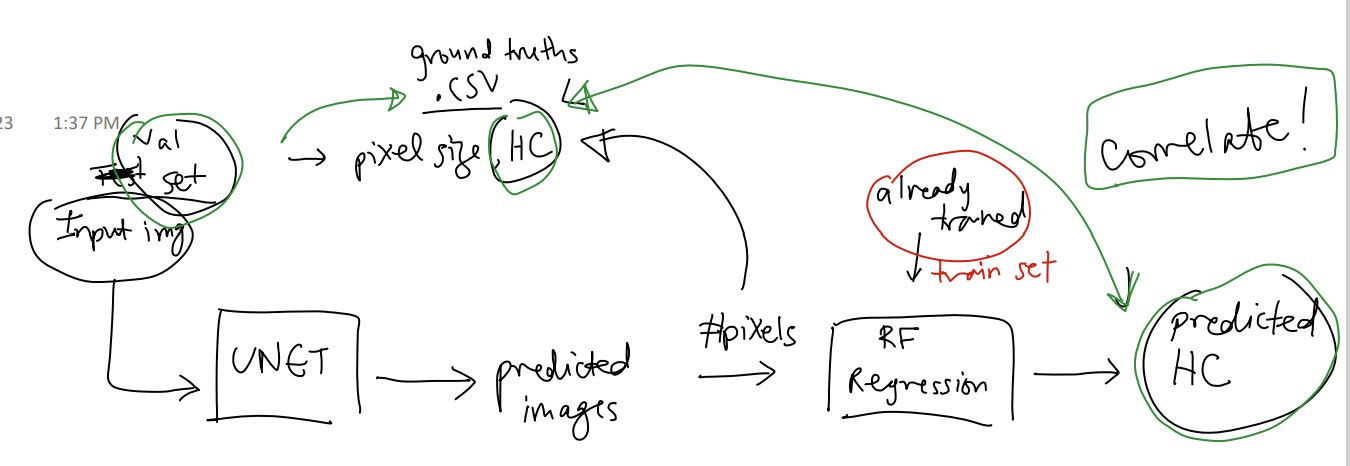

In [2]:
import os
from IPython.display import Image  as pyImage

flowchart_path = "Img/flowchart.jpg"
os.path.exists(flowchart_path)
pyImage(flowchart_path)


In [3]:
# TRAINING STEPS
# I am going to use train_splitted_val_image to feed in the function "Count_PIXEL SIZE" -- this will be train_X [pixel_count]
# there is a pixel_size in the csv, this is also train X[pixel_size]
# taking train_X[pixel_count, pixel_size] to fit Random Forest regressor, and Linear regressor
# there will be a train_Y which is HeadCircum (HC)

In [4]:
#  pred_image7  fiename 2, 11, 014,  this match the filename list in val_split..csv

In [5]:
# VALIDATION STEPS
# I am going to use UNET_Predicted_image to feed in the function "Count_PIXEL SIZE"  -- this will be val_X[pixl_count]
# I check that val
# use the csv match the UNET_Predicted_image filename
# continue the proceess to us RFmodel --> I will get a val_Y  (HC)

# on the same csvm there are also ground truth HC -> this is true_Y

# plot val_Y against true_Y


In [6]:
#import os  #imported already
from glob import glob
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import tree
import joblib
import pickle
import cv2

import json

import gradio as gr
#import graphviz



In [7]:
data_path_to = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/'
os.path.exists(data_path_to)

False

In [8]:
local_data_path_to="Data/Training-Splitted/"
os.path.exists(local_data_path_to)

True

In [9]:
# Jun 14
# train_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/Annotation/'
# files = sorted(os.listdir(train_img_data_path))
#print(files)



In [16]:
#Jun 15

#train_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'
#files = sorted(os.listdir(train_img_data_path))
#print(files)

In [23]:
# Jun 16
train_img_data_path = "Data/Training-Splitted/val/Annotation/"
files = sorted(os.listdir(train_img_data_path))
#os.path.exists(train_img_data_path)

In [18]:
local_predicted_image_path = 'Data/predicted_image7'
os.path.exists(local_predicted_image_path)

True

In [19]:
train_img_data_path

'Data/Training-Splitted/val/Annotation'

In [24]:
# work but skipped for gradio app creation
pixel_count=[]
for f in files:
    label = Image.open(train_img_data_path+f)
    label = np.array(label)
    label = tf.convert_to_tensor(label)
    label = tf.cast(label, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    pixel_count.append(np.sum(label))


In [25]:
# work but skipped for gradio app creation
# print(pixel_count)

[2820, 3208, 1980, 2044, 2928, 2228, 3188, 1720, 3020, 1612, 1984, 2048, 2200, 2380, 2888, 1556, 3388, 2140, 2892, 2732, 3616, 2504, 2152, 2296, 2860, 1932, 1840, 2068, 3379, 3076, 1632, 2160, 2284, 2008, 3324, 3504, 3216, 3296, 3644, 1928, 2152, 3132, 1804, 2392, 3316, 3380, 3220, 2204, 2728, 3336, 3020, 1960, 3144, 3380, 1972, 1560, 2768, 2772, 3720, 1684, 1752, 3652, 3932, 3672, 3208, 3152, 3648, 3136, 3792, 2916, 2068, 3356, 3804, 3304, 3592, 3828, 3180, 3024, 3064, 2684, 4028, 4064, 3520, 3416, 3596, 3604, 2916, 4276, 3408, 2860, 2844, 3952, 4160, 2976, 3428, 3552, 3796, 3424, 4088, 4128, 3276, 3900, 3372, 3652, 3368, 3452, 3944, 3060, 4192, 3128, 4060, 3200, 3056, 3612, 3744, 3840, 3768, 3756, 3172, 3208, 3848, 3728, 3524, 3048, 3368, 3412, 4068, 3596, 3120, 3092, 3332, 2348, 3180, 3576, 2036, 2596, 4304, 2912, 3656, 3744, 3824, 2328, 4296, 3296, 3332, 3512, 2796, 3200, 4092, 3844, 3908, 3556, 3044, 3092, 3316, 3852, 3176, 2792, 4212, 3420, 3244, 3964, 3704, 3252, 3828, 3480, 379

In [26]:
#train_pixel_sz_HC_file = local_data_path_to + 'training_set_pixel_size_and_HC.csv'  #Jun 14
# switch to use val_split as Seida train her UNET

train_pixel_sz_HC_file = local_data_path_to + 'val_split_pixel_size_and_HC.csv'  #Jun 15
os.path.exists(train_pixel_sz_HC_file)

True

In [ ]:
#train_pixel_sz_HC_df = pd.read_csv(train_pixel_sz_HC_file)  #Jun 14 run
#train_pixel_sz_HC_df.head()

In [27]:
train_pixel_sz_HC_file  #jun 15

'Data/Training-Splitted/val_split_pixel_size_and_HC.csv'

In [29]:
train_pixel_sz_HC_df = pd.read_csv(train_pixel_sz_HC_file)   #jun 15
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm)
0,2,002_HC.png,0.062033,68.75
1,12,011_HC.png,0.055484,69.90
2,16,014_3HC.png,0.077308,60.26
3,17,014_HC.png,0.078906,63.34
4,18,015_HC.png,0.060416,69.30


In [ ]:
#train_pixel_sz_HC_df = train_pixel_sz_HC_df.iloc[:, -3:]
#train_pixel_sz_HC_df.head()

In [30]:
#### FUNCTION: Define a function to update the filename .png to _Annotation.png ####
def update_filename(filename):
    return filename.replace(".png", "_Annotation.png")




In [32]:
# Apply the function to create a new column with updat filenames
train_pixel_sz_HC_df['anno_filename'] = train_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))

In [33]:
train_pixel_sz_HC_df.head()  #jun 14 run

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png


In [34]:
##### function get_pixe_count get_pixel_count(img_data_path, filename) ###
def get_pixel_count(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count

In [35]:
train_pixel_sz_HC_df['pixel_count'] = train_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(train_img_data_path, x))


In [36]:
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,2820
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,3208
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,1980
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,2044
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,2928


In [37]:
# Remove rows with missing values
# cleaned_df = train_pixel_sz_HC_df.dropna()  # no need to do it anymore
train_pixel_sz_HC_df = train_pixel_sz_HC_df.dropna()  # just in case

In [38]:
#Set target
target_name ='head circumference (mm)'

#y = cleaned_df[target_name]
y = train_pixel_sz_HC_df[target_name]

In [39]:
#Set Input Feature X = [x1,, x2]
feature_names = ['pixel_count','pixel size(mm)']
#X = cleaned_df[feature_names]
X = train_pixel_sz_HC_df[feature_names]

In [40]:
# do linear regression mmodel first
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#from sklearn.linear_model import LinearRegression

#model1 = LinearRegression()
#model1.fit(X_train1, y_train1)


In [41]:
from sklearn.linear_model import LinearRegression

# Apply transformation to the target variable
weight = 300
y_train1_transformed = y_train1 + weight

# Create and fit the linear regression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1_transformed)


LinearRegression()

In [42]:
# Make predictions on test data
y_pred = model1.predict(X_test1)

# Reverse the transformation
y_pred_transformed = y_pred - weight
y_pred1 = y_pred_transformed 


In [43]:
# evul linear reg model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred1 = model1.predict(X_test1)

# Calculate evaluation metrics
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)

print("Mean Squared Error of linear regression : ", mse1, ("(mm)"))
print("R-squared Score:", r2_1)


Mean Squared Error of linear regression :  88891.22647359964 (mm)
R-squared Score: -23.13927798576536


In [44]:
np.average(y_pred1)

470.5775944535239

In [45]:
train_pixel_sz_HC_df[target_name].mean()

177.98666666666668

In [49]:
## this is train model linear regression using train set
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

print("Coefficients:", model1.coef_[0])
print("Coefficients:", model1.coef_[1])

formula = "y = " + str(model1.coef_[0]) + " *  " + feature_names[0] + " + " + str(model1.coef_[1]) + " * " + feature_names[1]
print(formula)

# Export formula to a text file
with open(r"Output\formula.txt", "w") as file:
    file.write(formula)



Intercept: 133.89311331472328
Coefficients: [5.57214180e-02 1.15271953e+03]
Coefficients: 0.0557214180407123
Coefficients: 1152.719528109008
y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)


In [ ]:
# Train regress model 2: random forest regressor #####

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [53]:
X.head()

,pixel_count,pixel size(mm)
0,2820,0.062033
1,3208,0.055484
2,1980,0.077308
3,2044,0.078906
4,2928,0.060416


In [54]:
y.head()

0    68.75
1    69.90
2    60.26
3    63.34
4    69.30
Name: head circumference (mm), dtype: float64

In [55]:
# trial 1
# Split into validation and training data
#Train Random forest model on train_x train_y
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

# Make predictions on the validation data
rf_val_predictions = rf_model.predict(val_X)

# Calculate the mean absolute error
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

# Print the mean absolute error
print("Random Forest Validation MAE on X and y split:", rf_val_mae)


#rf_val_mae

Random Forest Validation MAE on X and y split: 5.161419999999979


In [56]:
# To improve accuracy, create a new Random Forest model which I will train on all training data X
rf_model_on_full_X = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_X.fit(X, y)


RandomForestRegressor(random_state=1)

In [58]:
rf_val_predictions = rf_model_on_full_X.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

# Print the mean absolute error
print("Random Forest Validation MAE on Full X", rf_val_mae)


Random Forest Validation MAE on Full X on Seiba's UNet Pred Anno 1.4117973333333338


In [60]:
rf_model_on_full_X.feature_importances_
feature_importance = rf_model_on_full_X.feature_importances_

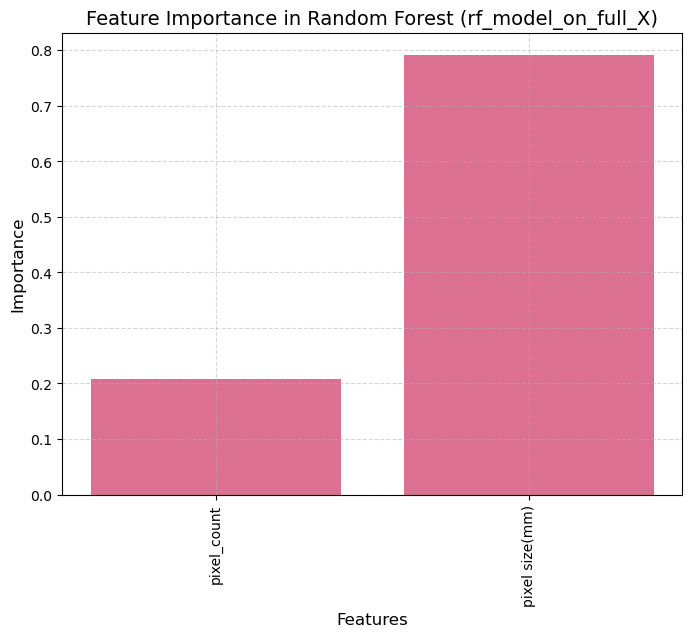

<Figure size 640x480 with 0 Axes>

In [72]:
plot_color = "palevioletred"

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance, color=plot_color)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance in Random Forest (rf_model_on_full_X)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Save the figure as an image file
plt.savefig('Output/RF_feature_importance_Jun17.png', dpi=300)


In [ ]:
# continue to "validate"  #Jun 14
# val_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'

In [ ]:
#val_img_data_path

In [ ]:
# note to self - val + test are together.
#test_pixel_sz_HC_file = local_data_path_to + 'test_set_pixel_size.csv'
#os.path.exists(test_pixel_sz_HC_file )

In [66]:
#### Validate UNET_Pred_Image_label7 -- the Seiba's trained UNet annotation predictin ####
val_img_data_path = 'Data\Predicted_image7'
os.path.exists(val_img_data_path)

True

In [67]:
val_pixel_sz_HC_file = local_data_path_to + 'val_split_pixel_size_and_HC.csv'
os.path.exists(val_pixel_sz_HC_file)

True

In [68]:
# continue to "validate"
val_pixel_sz_HC_df = pd.read_csv(val_pixel_sz_HC_file)
val_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm)
0,2,002_HC.png,0.062033,68.75
1,12,011_HC.png,0.055484,69.90
2,16,014_3HC.png,0.077308,60.26
3,17,014_HC.png,0.078906,63.34
4,18,015_HC.png,0.060416,69.30


In [69]:
val_pixel_sz_HC_df = val_pixel_sz_HC_df.rename(columns={'Unnamed: 0': 'id'})
val_pixel_sz_HC_df.head()


,id,filename,pixel size(mm),head circumference (mm)
0,2,002_HC.png,0.062033,68.75
1,12,011_HC.png,0.055484,69.90
2,16,014_3HC.png,0.077308,60.26
3,17,014_HC.png,0.078906,63.34
4,18,015_HC.png,0.060416,69.30


In [71]:
## export for demo input later ####
selected_columns = ['id', 'filename', 'pixel size(mm)']
val_pixel_sz_HC_df[selected_columns].to_csv(r'Output/demo_input.csv', index=False)


In [73]:
# continue to "validate; first get filename of predicteed annotation
val_pixel_sz_HC_df['anno_filename'] = val_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))

In [74]:
val_pixel_sz_HC_df

,id,filename,pixel size(mm),head circumference (mm),anno_filename
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png
...,...,...,...,...,...
295,970,783_4HC.png,0.246141,320.00,783_4HC_Annotation.png
296,976,787_HC.png,0.202475,324.60,787_HC_Annotation.png
297,982,792_HC.png,0.210600,299.17,792_HC_Annotation.png
298,985,794_HC.png,0.181221,308.50,794_HC_Annotation.png


In [75]:
# continue to "validate"  apply pixel count on "val img data"
val_pixel_sz_HC_df['pixel_count'] = val_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(val_img_data_path, x))


In [77]:
# Calculate summary statistics
summary_stats = val_pixel_sz_HC_df['pixel_count'].describe()

# Print the summary statistics
print(summary_stats)

# Export summary statistics as text file
with open(r'Output/summary_stats_SeibaUNet-Pixel_count.txt', 'w') as file:
    file.write(summary_stats.to_string())



count     300.000000
mean     1880.190000
std       554.125048
min        84.000000
25%      1593.000000
50%      1996.500000
75%      2280.000000
max      2916.000000
Name: pixel_count, dtype: float64


In [78]:
val_pixel_sz_HC_df.head()

,id,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735


In [79]:
# continue to "validate"
val_pixel_sz_HC_df=val_pixel_sz_HC_df.dropna()  #just in case

In [80]:
# continue to "validate"
val_pixel_sz_HC_df[feature_names].head()

,pixel_count,pixel size(mm)
0,861,0.062033
1,273,0.055484
2,219,0.077308
3,780,0.078906
4,735,0.060416


In [81]:
print(feature_names)

['pixel_count', 'pixel size(mm)']


In [82]:
X_val = val_pixel_sz_HC_df[feature_names]
X_val

,pixel_count,pixel size(mm)
0,861,0.062033
1,273,0.055484
2,219,0.077308
3,780,0.078906
4,735,0.060416
...,...,...
295,1818,0.246141
296,1110,0.202475
297,1698,0.210600
298,1668,0.181221


In [83]:
### can skip for demo not RF  ###
# Apply linear regression model prediction on Seiba UNet annotated pred
y_pred_w_LR = model1.predict(X_val)
y_pred_w_LR

array([253.375401  , 213.06269598, 235.21019011, 268.3125935 ,
       244.49057098, 286.51332025, 277.77220036, 316.65432801,
       248.55911988, 262.81566107, 279.83150749, 285.05266901,
       320.87020854, 237.07995105, 269.6045358 , 298.98547704,
       245.1840028 , 311.39471627, 298.23452641, 252.70426143,
       273.50171361, 252.89862105, 295.40118566, 294.17420044,
       276.38632717, 300.38353753, 330.49734829, 301.79926676,
       211.35008583, 282.98206327, 304.53137707, 310.50894307,
       326.73467438, 323.07156247, 299.11869984, 313.73707079,
       305.35316137, 252.85464355, 232.39176172, 333.69888549,
       327.04616343, 278.59564888, 357.45954972, 328.02817006,
       324.58253875, 310.54936638, 319.83406807, 336.18384343,
       339.26474662, 286.49118428, 346.47320152, 398.7080793 ,
       303.71193977, 270.52844809, 377.2198463 , 429.39603521,
       341.95510451, 305.34140249, 286.0039689 , 469.43935406,
       402.10761575, 296.18160212, 358.50582483, 341.57

In [84]:
### can skip for demo not RF  ###
print(target_name)

head circumference (mm)


In [85]:
### can skip for demo not RF  ###
y_val = val_pixel_sz_HC_df[target_name]
y_val

0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [87]:
### can skip for demo not RF  ###
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(y_val, y_pred_w_LR)

print("Linear regression model on Seiba UNet output: " + formula)
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Export summary statistics as text file (append to existing file)
with open(r'Output/summary_stats_SeibaUNet-Pixel_count.txt', 'a') as file:
    file.write('\n\n')
    file.write('\n\n')
    file.write(summary_stats.to_string())



Linear regression model on Seiba UNet output: y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)
Correlation coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85


In [88]:
val_pixel_sz_HC_df["predicted HC from LM"] = y_pred_w_LR

In [89]:
# after lapply annotated filename and pixel count function
val_pixel_sz_HC_df.head()

,id,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861,253.375401
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273,213.062696
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219,235.210190
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780,268.312593
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735,244.490571


In [ ]:
print(formula)

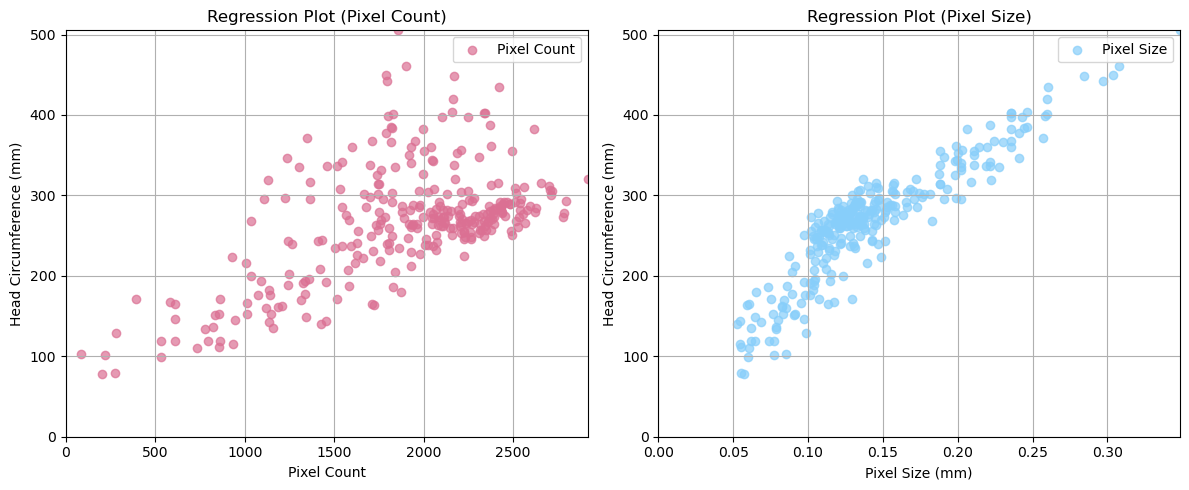

In [95]:
import numpy as np
import matplotlib.pyplot as plt

color1 = "palevioletred"
color2 = "lightskyblue"

# Convert pixel_count and pixel_size to arrays
pixel_count = np.array(val_pixel_sz_HC_df["pixel_count"])
pixel_size = np.array(val_pixel_sz_HC_df["pixel size(mm)"])

# Compute the corresponding y values based on the equation
y = 0.05572141804071231 * pixel_count + 1152.7195281090083 * pixel_size

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the pixel count subplot
ax1.scatter(pixel_count, y, color=color1, alpha=0.7, label='Pixel Count')
ax1.set_xlim(0, np.max(pixel_count))
ax1.set_ylim(0, np.max(y))
ax1.set_xlabel('Pixel Count')
ax1.set_ylabel('Head Circumference (mm)')
ax1.set_title('Regression Plot (Pixel Count)')
ax1.grid(True)

# Plot the pixel size subplot
ax2.scatter(pixel_size, y, color=color2, alpha=0.7, label='Pixel Size')
ax2.set_xlim(0, np.max(pixel_size))
ax2.set_ylim(0, np.max(y))
ax2.set_xlabel('Pixel Size (mm)')
ax2.set_ylabel('Head Circumference (mm)')
ax2.set_title('Regression Plot (Pixel Size)')
ax2.grid(True)

# Add a legend to the subplots
ax1.legend()
ax2.legend()

# Adjust the spacing between subplots 
plt.tight_layout()

# Save the figure as an image file
plt.savefig('Output/regression_plots.png', transparent=True)

# Show the plots
plt.show()



In [ ]:
## now plot RF model ##

In [96]:
X_val



,pixel_count,pixel size(mm)
0,861,0.062033
1,273,0.055484
2,219,0.077308
3,780,0.078906
4,735,0.060416
...,...,...
295,1818,0.246141
296,1110,0.202475
297,1698,0.210600
298,1668,0.181221


In [98]:
y_pred2_w_RF = rf_model_on_full_X.predict(X_val)

val_pixel_sz_HC_df["predicted HC from RF"] = y_pred2_w_RF

In [99]:
import numpy as np

# Calculate summary statistics
mean = np.mean(y_pred2_w_RF)
std = np.std(y_pred2_w_RF)
min_value = np.min(y_pred2_w_RF)
max_value = np.max(y_pred2_w_RF)

# Print the summary statistics
print("Mean:", mean)
print("Standard Deviation:", std)
print("Minimum:", min_value)
print("Maximum:", max_value)

# Export summary statistics as text file (append to existing file)
with open(r'Output/summary_stats_SeibaUNet-Pixel_count.txt', 'a') as file:
    file.write('\n\n')
    file.write('\n Predicted Pixel Count via RF\n')
    file.write(summary_stats.to_string())


Mean: 114.59561066666666
Standard Deviation: 40.867711863307825
Minimum: 62.96160000000008
Maximum: 263.82059999999984


In [100]:
val_pixel_sz_HC_df

,id,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM,predicted HC from RF
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861,253.375401,63.5237
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273,213.062696,63.6042
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219,235.210190,62.9616
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780,268.312593,63.7491
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735,244.490571,63.4824
...,...,...,...,...,...,...,...,...
295,970,783_4HC.png,0.246141,320.00,783_4HC_Annotation.png,1818,518.925937,184.0790
296,976,787_HC.png,0.202475,324.60,787_HC_Annotation.png,1110,429.141222,142.0166
297,982,792_HC.png,0.210600,299.17,792_HC_Annotation.png,1698,471.270900,150.3146
298,985,794_HC.png,0.181221,308.50,794_HC_Annotation.png,1668,435.732987,126.1120


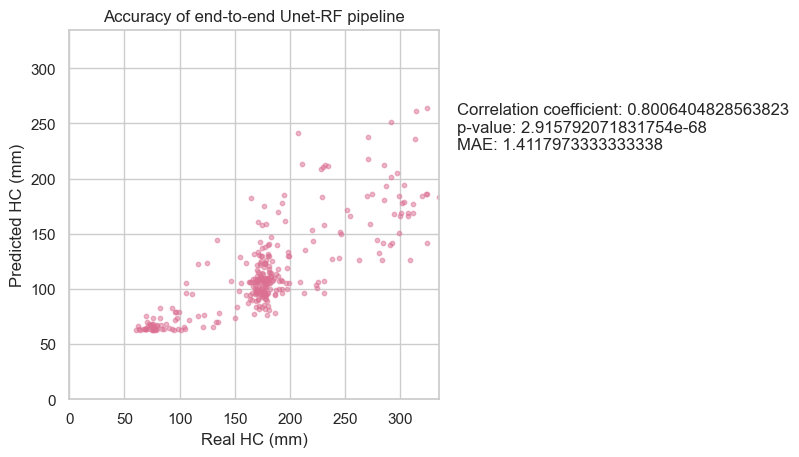

<Figure size 640x480 with 0 Axes>

In [104]:
## Plot predictd HC vs real HC
## that is plot  y_pred2_w_RF vs y_val

#  label of y_pred2_w_RF is Predicted HC
# label of y_val real HC
# Plot title Accuracy of RF regression
# Plot text: "random tree regression model: 
# Correlation coefficient: 0.8006404828563823
# p-value: 2.915792071831754e-68
# MAE: 1.4117973333333338"

import matplotlib.pyplot as plt
import numpy as np

# Define the darker pink color
darker_pink = (1, 0.5, 0.5)

# Add jitter to the data points
jitter_amount = 0.05
y_val_jittered = y_val + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_val))
y_pred2_w_RF_jittered = y_pred2_w_RF + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_pred2_w_RF))

# Plot y_pred2_w_RF vs y_val with smaller point size and transparency
#plt.scatter(y_val_jittered, y_pred2_w_RF_jittered, color=darker_pink, alpha=0.5, s=10)
plt.scatter(y_val_jittered, y_pred2_w_RF_jittered, color=color1, alpha=0.5, s=10)
plt.xlabel('Real HC (mm)')
plt.ylabel('Predicted HC (mm)')
plt.title('Accuracy of end-to-end Unet-RF pipeline')

# Set the same scale for x and y axes
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, max(max(y_val), max(y_pred2_w_RF)))
plt.ylim(0, max(max(y_val), max(y_pred2_w_RF)))
plt.grid(True)

# Save the figure without a caption
plt.savefig('Output/end-to-end_pred_vs_real_HC_Seiba_Nocaption.png', transparent=True)

# Add text to the plot with adjusted position
text = "\n"
text += "Correlation coefficient: 0.8006404828563823\n"
text += "p-value: 2.915792071831754e-68\n"
text += "MAE: 1.4117973333333338"
plt.text(1.05, 0.85, text, ha='left', va='top', transform=plt.gca().transAxes)

# Show the plot
plt.show()

plt.savefig('Output/end-to-end_pred_vs_real_HC_Seiba_caption.png')


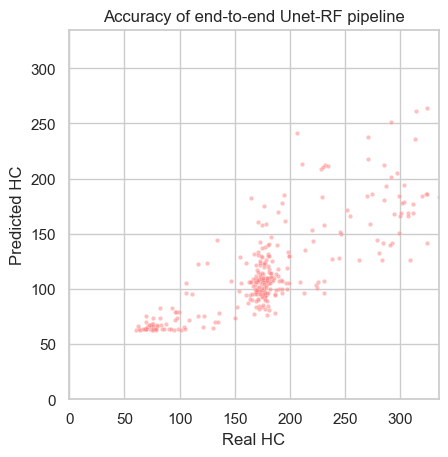

<Figure size 640x480 with 0 Axes>

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

# Set the Seaborn style
sns.set(style='whitegrid')

# Define the darker pink color
darker_pink = (1, 0.5, 0.5)

# Add jitter to the data points
jitter_amount = 0.05
y_val_jittered = y_val + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_val))
y_pred2_w_RF_jittered = y_pred2_w_RF + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_pred2_w_RF))

# Create the scatter plot

scatter = sns.scatterplot(x=y_val_jittered, y=y_pred2_w_RF_jittered, color=darker_pink, alpha=0.5, s=10)
plt.xlabel('Real HC')
plt.ylabel('Predicted HC')
plt.title('Accuracy of end-to-end Unet-RF pipeline')

# Set the same scale for x and y axes
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, max(max(y_val), max(y_pred2_w_RF)))
plt.ylim(0, max(max(y_val), max(y_pred2_w_RF)))

# Add tooltips
mplcursors.cursor(scatter) 

# Show the plot
plt.show()

plt.savefig('Output/End-to-end_pred_vs_real_HC-sn.png')

In [105]:
y_val.head()


0    68.75
1    69.90
2    60.26
3    63.34
4    69.30
Name: head circumference (mm), dtype: float64

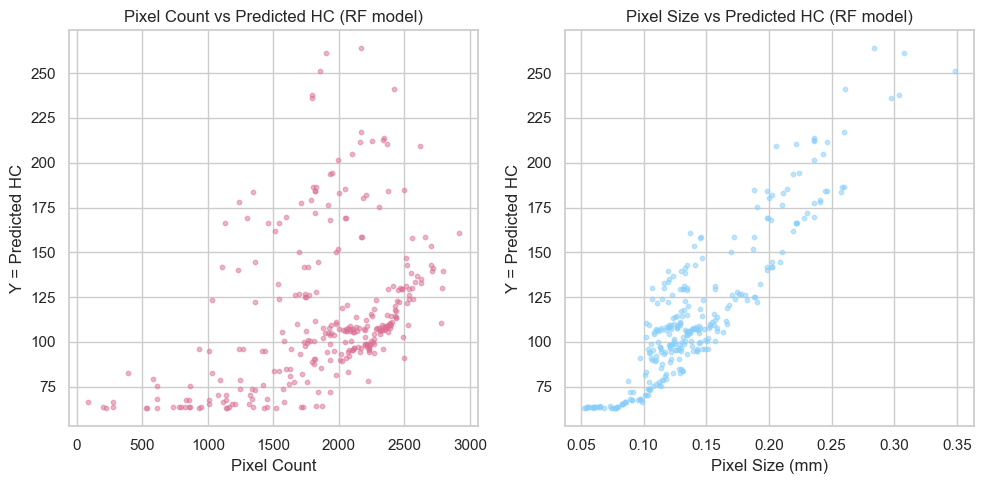

In [151]:
import matplotlib.pyplot as plt

# Get the feature values for plotting
pixel_count = val_pixel_sz_HC_df['pixel_count']
pixel_size = val_pixel_sz_HC_df['pixel size(mm)']


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot pixel_count vs y_pred_rf
axs[0].scatter(pixel_count, y_pred2_w_RF, color=color1, label='Predicted Values', alpha=0.5, s=10)
axs[0].set_xlabel('Pixel Count')
axs[0].set_ylabel('Y = Predicted HC')
axs[0].set_title('Pixel Count vs Predicted HC (RF model)')

# Plot pixel_size vs y_pred_rf
axs[1].scatter(pixel_size, y_pred2_w_RF, color=color2, label='Predicted Values', alpha=0.5, s=10)
axs[1].set_xlabel('Pixel Size (mm)')
axs[1].set_ylabel('Y = Predicted HC')
axs[1].set_title('Pixel Size vs Predicted HC (RF model)')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



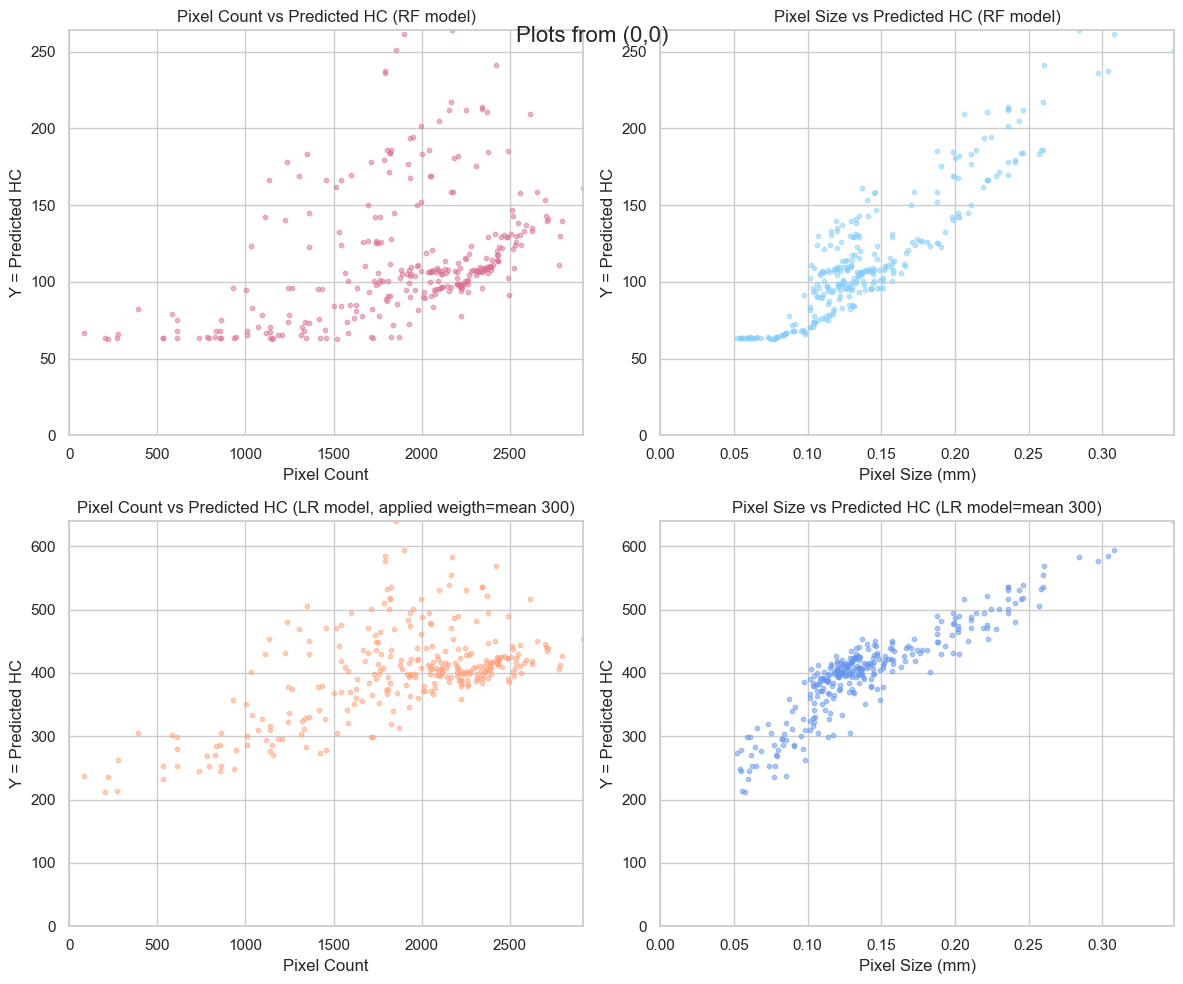

In [153]:
### to plot from 0,0
import matplotlib.pyplot as plt

# Get the feature values for plotting
pixel_count = val_pixel_sz_HC_df['pixel_count']
pixel_size = val_pixel_sz_HC_df['pixel size(mm)']

color3="lightsalmon"
color4="cornflowerblue"

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot pixel_count vs y_pred_rf
axs[0, 0].scatter(pixel_count, y_pred2_w_RF, color=color1, label='Predicted Values', alpha=0.5, s=10)
axs[0, 0].set_xlabel('Pixel Count')
axs[0, 0].set_ylabel('Y = Predicted HC')
axs[0, 0].set_title('Pixel Count vs Predicted HC (RF model)')
axs[0, 0].set_xlim(0, pixel_count.max())
axs[0, 0].set_ylim(0, y_pred2_w_RF.max())

# Plot pixel_size vs y_pred_rf
axs[0, 1].scatter(pixel_size, y_pred2_w_RF, color=color2, label='Predicted Values', alpha=0.5, s=10)
axs[0, 1].set_xlabel('Pixel Size (mm)')
axs[0, 1].set_ylabel('Y = Predicted HC')
axs[0, 1].set_title('Pixel Size vs Predicted HC (RF model)')
axs[0, 1].set_xlim(0, pixel_size.max())
axs[0, 1].set_ylim(0, y_pred2_w_RF.max())

# Plot pixel_count vs y_pred_lr
axs[1, 0].scatter(pixel_count, y_pred_w_LR, color=color3, label='Predicted Values', alpha=0.5, s=10)
axs[1, 0].set_xlabel('Pixel Count')
axs[1, 0].set_ylabel('Y = Predicted HC')
axs[1, 0].set_title('Pixel Count vs Predicted HC (LR model, applied weigth=mean 300)')
axs[1, 0].set_xlim(0, pixel_count.max())
axs[1, 0].set_ylim(0, y_pred_w_LR.max())

# Plot pixel_size vs y_pred_lr
axs[1, 1].scatter(pixel_size, y_pred_w_LR, color=color4, label='Predicted Values', alpha=0.5, s=10)
axs[1, 1].set_xlabel('Pixel Size (mm)')
axs[1, 1].set_ylabel('Y = Predicted HC')
axs[1, 1].set_title('Pixel Size vs Predicted HC (LR model=mean 300)')
axs[1, 1].set_xlim(0, pixel_size.max())
axs[1, 1].set_ylim(0, y_pred_w_LR.max())

# Add a heading to the file
fig.text(0.5, 0.95, 'Plots from (0,0)', ha='center', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as an image file
plt.savefig('Output/scatter_plots00.png')



In [112]:
#### Compare Model and Conclude

# Calculate the correlation coefficient and p-value  # linear regression
correlation_lr, p_value_lr = pearsonr(y_val, y_pred_w_LR)

print("Linear regression model: " + formula)
print("Correlation coefficient:", correlation_lr)
print("p-value:", p_value_lr)
print("MAE:", mse1)

print(" ")
correlation_rf, p_value_rf = pearsonr(y_val, y_pred2_w_RF)

print("random tree regression model: " )
print("Correlation coefficient:", correlation_rf)
np.set_printoptions(precision=8)
print("p-value:", p_value_rf)
print("MAE:", rf_val_mae)


# p-value = 0 that is reject null hypothesis-- the 
# Compare the models
if abs(correlation_lr) > abs(correlation_rf):
    best_model = "Linear Regression"
    best_correlation = correlation_lr
    best_p_value = p_value_lr
else:
    best_model = "Random Forest"
    best_correlation = correlation_rf
    best_p_value = p_value_rf

print("  ")
print("Best Model based on correlation:")
print("Model:", best_model)
print("Correlation Coefficient:", best_correlation)
print("p-value:", best_p_value)

np.savetxt('output\summary_stats.txt', summary_stats)

Linear regression model: y = 0.0557214180407123 *  pixel_count + 1152.719528109008 * pixel size(mm)
Correlation coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85
MAE: 88891.22647359964
 
random tree regression model: 
Correlation coefficient: 0.8006404828563823
p-value: 2.915792071831754e-68
MAE: 1.4117973333333338
  
Best Model based on correlation:
Model: Linear Regression
Correlation Coefficient: 0.8512425465736275
p-value: 1.928556935064102e-85


In [ ]:
# Random Forest Model:
# Correlation coefficient: 0.8006404828563823
# p-value: 2.915792071831754e-68
# Linear Regression Model with weight = meean = 300:
# Correlation coefficient: 0.8512425465736275
# p-value: 1.928556935064102e-85

### therefore we use RANDOM FOREST REGRESSOR ###

In [115]:
import joblib

# Assuming rf_model_on_full_data is your trained Random Forest model
# ...

# Specify the filename and path for saving the model
model_filename = 'Modelfile/rf_seiba-Jun17.joblib'

# Save the model to a file
joblib.dump(rf_model_on_full_X, model_filename)


['Modelfile/rf_seiba-Jun16.joblib']

In [117]:
import pickle
# save fitted the modelin pkl form, so gradio can take it 
with open("Modelfile/rf_seiba-Jun17.pkl", "wb") as f:
    pickle.dump(rf_model_on_full_X, f) 

In [ ]:
##### run 2nd pixel count on 2nd UNet trained Arfaa's ######

In [ ]:
#selected_predicted_data_path_to = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/predicted_images2/'
#os.path.exists(predicted_data_path_to)

In [119]:
##### run pixel count on Arfaa prediction  i.e. 2nd training 
train_img_data_path_a = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/unet/arfaa unet predictions'
train_img_data_path_a = 'Data/arfaa unet predictions'
os.path.exists(train_img_data_path_a)


True

In [120]:
train_pixel_sz_HC_df['pixel_count_a'] = train_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(train_img_data_path_a, x))


In [121]:
train_pixel_sz_HC_df.head

<bound method NDFrame.head of      Unnamed: 0     filename  pixel size(mm)  head circumference (mm)  \
0             2   002_HC.png        0.062033                    68.75   
1            12   011_HC.png        0.055484                    69.90   
2            16  014_3HC.png        0.077308                    60.26   
3            17   014_HC.png        0.078906                    63.34   
4            18   015_HC.png        0.060416                    69.30   
..          ...          ...             ...                      ...   
295         970  783_4HC.png        0.246141                   320.00   
296         976   787_HC.png        0.202475                   324.60   
297         982   792_HC.png        0.210600                   299.17   
298         985   794_HC.png        0.181221                   308.50   
299         989   796_HC.png        0.257187                   335.00   

              anno_filename  pixel_count  pixel_count_a  
0     002_HC_Annotation.png        

In [122]:
temp_y = train_pixel_sz_HC_df['pixel_count_a']
print(temp_y.describe())


count     300.000000
mean     6012.583333
std      2437.684287
min         0.000000
25%      4297.500000
50%      6473.500000
75%      7967.750000
max      9970.000000
Name: pixel_count_a, dtype: float64


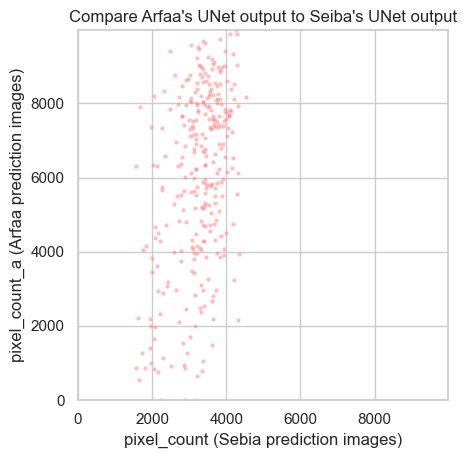

<Figure size 640x480 with 0 Axes>

In [126]:
### Compare Arfaa's prediction to Seiba's prediction

import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

# Set the Seaborn style
sns.set(style='whitegrid')

# Define the darker pink color
darker_pink = (1, 0.5, 0.5)

x_p = train_pixel_sz_HC_df['pixel_count']
y_p = train_pixel_sz_HC_df['pixel_count_a']

# Create the scatter plot pixel_count_a vs pixel_count
scatter = sns.scatterplot(x=x_p, y=y_p, color=darker_pink, alpha=0.5, s=10)
plt.xlabel('pixel_count (Sebia prediction images)')
plt.ylabel('pixel_count_a (Arfaa prediction images)')
plt.title('Compare Arfaa\'s UNet output to Seiba\'s UNet output')

# Set the same scale for x and y axes
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, max(max(x_p), max(y_p)))
plt.ylim(0, max(max(x_p), max(y_p)))

# Add tooltips
mplcursors.cursor(scatter)

# Add comment
#plt.text(0.5, -0.6, 'i.e Arfaa prediction image thicker and fuller', transform=plt.gca().transAxes, ha='center')

# Show the plot
plt.show()
plt.savefig('compare Arfaa Sebia UNet output.png')
#i.e Arfaa prediction image thicker and fuller

In [127]:
train_pixel_sz_HC_df['pixel_count_a'] = temp_y

In [128]:
#Set Input Feature X = [x1,, x2]
feature_names_a = ['pixel_count_a','pixel size(mm)']
#X = cleaned_df[feature_names]
X_a = train_pixel_sz_HC_df[feature_names_a]
X_a

,pixel_count_a,pixel size(mm)
0,1537,0.062033
1,637,0.055484
2,1010,0.077308
3,1635,0.078906
4,1269,0.060416
...,...,...
295,4108,0.246141
296,3899,0.202475
297,2669,0.210600
298,2149,0.181221


In [129]:
#Set target
target_name ='head circumference (mm)'

#y = cleaned_df[target_name]
y = train_pixel_sz_HC_df[target_name]
y

0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib

# To improve accuracy, create a new Random Forest model which I will train on all training data
rf_model_Arfaa_anno_image = RandomForestRegressor(random_state=1)

# Fit rf_model_Arfaa_anno_image on all data from the training data
rf_model_Arfaa_anno_image.fit(X_a, y)



RandomForestRegressor(random_state=1)

In [131]:
os.path.exists("Modelfile/")

True

In [ ]:
### export model ####

In [132]:
model_filename = 'Modelfile/rf_arfaa.joblib'
joblib.dump(rf_model_Arfaa_anno_image, model_filename)

['Modelfile/rf_arfaa.joblib']

In [133]:
# save fitted the modelin pkl form, so gradio can take it 
with open("Modelfile/rf_Arfaa_jun16.pkl", "wb") as f:
    pickle.dump(rf_model_Arfaa_anno_image, f) 

In [134]:
y_val = val_pixel_sz_HC_df[target_name]
y_val

0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [135]:
y_val.describe()

count    300.000000
mean     177.986667
std       62.544111
min       60.260000
25%      164.005000
50%      175.920000
75%      192.600000
max      335.000000
Name: head circumference (mm), dtype: float64

In [137]:
val_pixel_sz_HC_df['pixel_count_a'] = temp_y
val_pixel_sz_HC_df

,id,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM,predicted HC from RF,pixel_count_a
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861,253.375401,63.5237,1537
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273,213.062696,63.6042,637
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219,235.210190,62.9616,1010
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780,268.312593,63.7491,1635
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735,244.490571,63.4824,1269
...,...,...,...,...,...,...,...,...,...
295,970,783_4HC.png,0.246141,320.00,783_4HC_Annotation.png,1818,518.925937,184.0790,4108
296,976,787_HC.png,0.202475,324.60,787_HC_Annotation.png,1110,429.141222,142.0166,3899
297,982,792_HC.png,0.210600,299.17,792_HC_Annotation.png,1698,471.270900,150.3146,2669
298,985,794_HC.png,0.181221,308.50,794_HC_Annotation.png,1668,435.732987,126.1120,2149


In [138]:
X_val_a = val_pixel_sz_HC_df[feature_names_a]
X_val_a

,pixel_count_a,pixel size(mm)
0,1537,0.062033
1,637,0.055484
2,1010,0.077308
3,1635,0.078906
4,1269,0.060416
...,...,...
295,4108,0.246141
296,3899,0.202475
297,2669,0.210600
298,2149,0.181221


In [139]:
y_pred2_w_RF_a = rf_model_Arfaa_anno_image.predict(X_val_a)
#import numpy as np

# Calculate summary statistics
summary_stats = {
    'count': len(y_pred2_w_RF_a),
    'mean': np.mean(y_pred2_w_RF_a),
    'std': np.std(y_pred2_w_RF_a),
    'min': np.min(y_pred2_w_RF_a),
    '25%': np.percentile(y_pred2_w_RF_a, 25),
    '50%': np.percentile(y_pred2_w_RF_a, 50),
    '75%': np.percentile(y_pred2_w_RF_a, 75),
    'max': np.max(y_pred2_w_RF_a)
}

# Print the summary statistics
for stat, value in summary_stats.items():
    print(f"{stat}: {value}")


count: 300
mean: 177.781876
std: 58.11951969968974
min: 66.24200000000008
25%: 166.16464999999994
50%: 176.64615000000006
75%: 191.86999999999978
max: 315.16870000000034


In [140]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
rf_mae_a = mean_absolute_error(y_val, y_pred2_w_RF_a)

# Print the mean absolute error
print("Random Forest Validation MAE with Arfaa anno image:", rf_mae_a)


Random Forest Validation MAE with Arfaa anno image: 7.626877333333329


In [141]:
val_pixel_sz_HC_df['pred HC-RF-from-Arfaa_anno'] = y_pred2_w_RF_a
val_pixel_sz_HC_df

,id,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM,predicted HC from RF,pixel_count_a,pred HC-RF-from-Arfaa_anno
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,861,253.375401,63.5237,1537,69.8108
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,273,213.062696,63.6042,637,71.6494
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,219,235.210190,62.9616,1010,66.7377
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,780,268.312593,63.7491,1635,66.2420
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,735,244.490571,63.4824,1269,70.3231
...,...,...,...,...,...,...,...,...,...,...
295,970,783_4HC.png,0.246141,320.00,783_4HC_Annotation.png,1818,518.925937,184.0790,4108,304.6112
296,976,787_HC.png,0.202475,324.60,787_HC_Annotation.png,1110,429.141222,142.0166,3899,298.4695
297,982,792_HC.png,0.210600,299.17,792_HC_Annotation.png,1698,471.270900,150.3146,2669,290.9504
298,985,794_HC.png,0.181221,308.50,794_HC_Annotation.png,1668,435.732987,126.1120,2149,256.1271


In [142]:
val_pixel_sz_HC_df.to_csv('output/everything-val_pred_HC_pixel_sz.csv', sep='|', index=False)


In [143]:
val_y.describe()

count     75.000000
mean     179.354800
std       62.187307
min       67.190000
25%      169.410000
50%      176.570000
75%      189.560000
max      335.000000
Name: head circumference (mm), dtype: float64

In [154]:
# Calculate the correlation coefficients and p-values
correlation_rf_a, p_value_rf_a = pearsonr(y_val, y_pred2_w_RF_a)
#correlation_lr, p_value_lr = pearsonr(y_val, y_pred_w_LR)

In [149]:
import json

# Print the correlation coefficients and p-values
print("Random Forest Model on Seida anno files:")
print("Correlation coefficient:", correlation_rf)
print("p-value:", p_value_rf)
print("\n")

print("Random Forest Model on Arfaa anno files:")
print("Random Forest Validation MAE with Arfaa anno image:", rf_mae_a)
print("Correlation coefficient:", correlation_rf_a)
print("p-value:", p_value_rf_a)


# p-value = 0 that is reject null hypothesis-- the 
# Compare the models
if abs(correlation_rf) > abs(correlation_rf_a):
    best_model = "RF on Seiba"
    best_correlation = correlation_lr
    best_p_value = p_value_lr
else:
    best_model = "RF on Arfaa"
    best_correlation = correlation_rf
    best_p_value = p_value_rf

print("  ")
print("Best Model based on correlation:")
print("Model:", best_model)
print("Correlation Coefficient:", best_correlation)
print("p-value:", best_p_value)

# Convert the dictionary to a JSON string
summary_stats_json = json.dumps(summary_stats)

# Save the JSON string to a text file
with open('output/summary_stats.txt', 'w') as file:
    file.write(summary_stats_json)



Random Forest Model on Seida anno files:
Correlation coefficient: 0.8006404828563823
p-value: 2.915792071831754e-68


Random Forest Model on Arfaa anno files:
Random Forest Validation MAE with Arfaa anno image: 7.626877333333329
Correlation coefficient: 0.9829934658602728
p-value: 2.1602007428905093e-221
  
Best Model based on correlation:
Model: RF on Arfaa
Correlation Coefficient: 0.8006404828563823
p-value: 2.915792071831754e-68


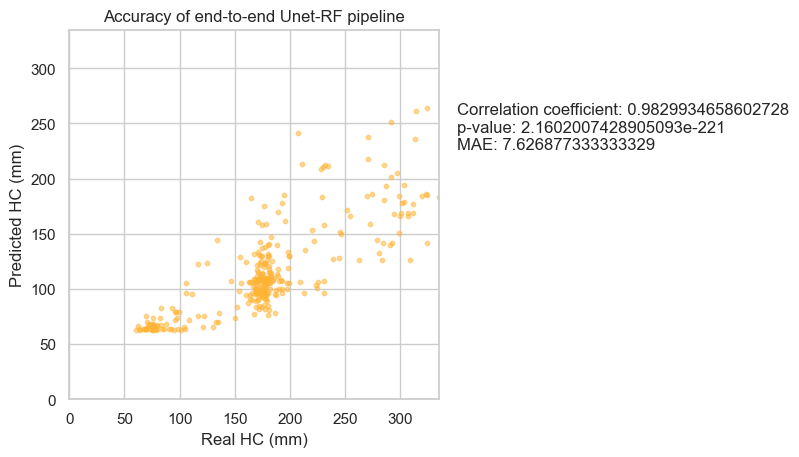

<Figure size 640x480 with 0 Axes>

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Define the darker pink color
darker_yellow = (1, 0.7, 0.2)

# Add jitter to the data points
jitter_amount = 0.05
y_val_jittered = y_val + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_val))
y_pred2_w_RF_jittered = y_pred2_w_RF + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_pred2_w_RF))

# Plot y_pred2_w_RF vs y_val with smaller point size and transparency
plt.scatter(y_val_jittered, y_pred2_w_RF_jittered, color=darker_yellow, alpha=0.5, s=10)
plt.xlabel('Real HC (mm)')
plt.ylabel('Predicted HC (mm)')
plt.title('Accuracy of end-to-end Unet-RF pipeline')

# Set the same scale for x and y axes
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, max(max(y_val), max(y_pred2_w_RF)))
plt.ylim(0, max(max(y_val), max(y_pred2_w_RF)))

# Add text to the plot with adjusted position
text = "\n"
text += "Correlation coefficient: 0.9829934658602728\n"
text += "p-value: 2.1602007428905093e-221\n"
text += "MAE: 7.626877333333329"
plt.text(1.05, 0.85, text, ha='left', va='top', transform=plt.gca().transAxes)

# Show the plot
plt.show()

plt.savefig('Output/end-to-end_pred_vs_real_HC(Arfaa.png')

In [ ]:
# predict from single predicted HC labelled image
#get_pixel_count(predicted_data_path_to, x)
# file 41 pixel siz 0.08

In [156]:
import numpy as np
import gradio as gr

def get_pixel_count_gradio(input_img):
    label = np.array(input_img)
    pixel_count = np.sum(label)
    return pixel_count

inputs = [
    gr.inputs.Image(label="Binary Image", shape=(800, 540))
]
outputs = gr.outputs.Textbox(label="Pixel count")

interface = gr.Interface(
    fn=get_pixel_count_gradio,
    inputs=inputs,
    outputs=outputs,
    title="Convert Binary Image to Pixel Count"
)

interface.launch()


C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
#  https://5f3a34f812d9f2bde3.gradio.live  Convert Binary Image to Pixel Count Jun 17, 2023

In [158]:
interface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://5f3a34f812d9f2bde3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
# Load the RF model
#rf_model = joblib.load("rf_model_joblib_file")

In [ ]:
#  https://9cc7148ac18b49fbb0.gradio.live   HC Predictor

In [9]:
import os
import joblib
rf_model_file ="Modelfile/rf_seiba-Jun16.joblib"
os.path.exists(rf_model_file)

True

In [10]:
# Load the RF model
rf_model = joblib.load(rf_model_file)

In [11]:
import numpy as np
import gradio as gr
#import joblib

# Load the RF model
#rf_model = joblib.load("path/to/rf_model.joblib")

def get_pixel_count_gradio(input_img):
    # Add your implementation to calculate the pixel count from the input image
    pixel_count = 0  # Replace with your own code
    return pixel_count

def predict_head_circumference(input_img, pixel_size):
    # Use the pixel size and other features to make a prediction
    feature_names = ['pixel_count', 'pixel size(mm)']  # Add other relevant features here
    pixel_count = get_pixel_count_gradio(input_img)
    
    prediction = rf_model.predict([[pixel_count, pixel_size]])[0]
    
    return prediction

inputs = [
    gr.inputs.Image(label="Image"),
    gr.inputs.Number(label="Pixel Size (mm)")
]

output = gr.outputs.Textbox(label="Head Circumference (mm)")

gr_interface = gr.Interface(
    fn=predict_head_circumference,
    inputs=inputs,
    outputs=output,
    title="Head Circumference Predictor",
    description="Predicts the head circumference based on an image and pixel size.",
)

gr_interface.launch(share=True)


C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app


C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\annch\.conda\envs\unet-py39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [160]:
# Specify the path to save the checkpoint
checkpoint_path = 'Modelfile/RF-Jun17.ckpt'

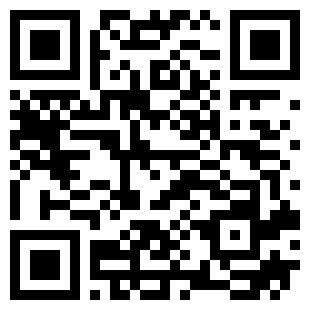

In [1]:
from IPython.display import Image
image_path = 'Img/QR_binary_gradio.png'
Image(filename=image_path)

In [ ]:
#### ignore below ###

In [ ]:
import pandas as pd
import gradio as gr

# Define the function to perform the lookup
def lookup_pixel_size(csv_file, id):
    # Load the CSV file
    data = pd.read_csv(csv_file)
    
    # Find the row with the matching ID prefix in the filename column
    matching_row = data[data['filename'].str.startswith(id)]
    
    # Get the corresponding pixel size value
    pixel_size = matching_row['pixel size'].values[0]
    
    return pixel_size

def lookup_pixel_size2(id):
    # Load the CSV file
    data = pd.read_csv(csv_file)
    
    # Find the row with the matching ID prefix in the filename column
    matching_row = data[data['filename'].str.startswith(id)]
    
    # Get the corresponding pixel size value
    pixel_size = matching_row['pixel size'].values[0]
    
    return pixel_size

# Define the input and output interfaces for Gradio
inputs = [
    gr.inputs.File(label="CSV File"),
    gr.inputs.Textbox(label="ID")
]

output = gr.outputs.Textbox(label="Pixel Size")

# Create the Gradio interfaces for the two tabs
interface1 = gr.Interface(
    fn=lookup_pixel_size,
    inputs=inputs,
    outputs=output,
    title="Pixel Size Lookup 1",
    description="Look up the pixel size based on an ID in a CSV file.",
)

interface2 = gr.Interface(
    fn=lookup_pixel_size2,
    inputs=inputs,
    outputs=output,
    title="Pixel Size Lookup 2",
    description="Another pixel size lookup based on an ID in a CSV file.",
)

# Create the Gradio app with tabs
grapp = gr.Interface(
    [interface1, interface2],
    ["Pixel Size Lookup 1", "Pixel Size Lookup 2"],
    title="Pixel Size Lookup",
    description="Look up pixel sizes based on IDs in a CSV file.",
    outputs=output  # Set the output configuration for the Gradio app
)

# Run the Gradio app
grapp.launch()



In [ ]:
import pandas as pd

# Assuming you have a DataFrame called "df"
# Export the DataFrame to a CSV file
val_pixel_sz_HC_df.to_csv('Output/val_pixel_sz_HC_df_output.csv', index=False)


In [ ]:
#files = sorted(os.listdir(predicted_data_path_to))
#pixel_count_list =[]
#for f in files:
#    pixel_count = get_pixel_count(predicted_data_path_to, f)
#    pixel_count_list.append(pixel_count)

In [ ]:
##### function get_pixe_count get_pixel_count(img_data_path, filename) ###  duplicate code from above.
def get_pixel_count(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count

